In [1]:
import tensorflow as tf 
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


# Loading Pretrained Model

In [2]:
# load the pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet')

# Display model summary
model.summary()



96112376/96112376 [==============================] - 100s 1us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activ

# Model Inferencing

In [5]:
# Prediction Function

def predict_image(model, image_path):
    
    # load the image with the required target size for InceptionV3
    img = load_img(image_path, target_size=(299,299))
    
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    
    # Add a batch dimension (1,299,299,3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocessing the image for InceptionV3
    img_array = preprocess_input(img_array)
    
    # Predict the image class
    predictions = model.predict(img_array)
    
    # Decide the predictions into readable labels
    decoded_predictions = decode_predictions(predictions, top=5)
    return decoded_predictions[0]

1/1 [==============================] - 0s 85ms/step
Predictions
1: jellyfish (0.95)
2: sea_anemone (0.00)
3: nematode (0.00)
4: parachute (0.00)
5: spoonbill (0.00)


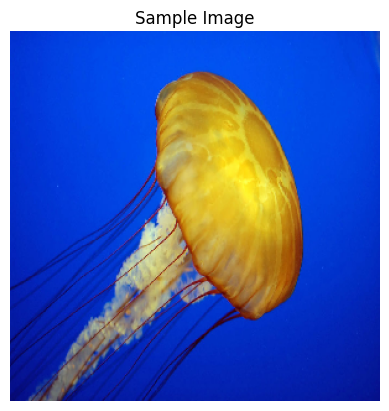

In [6]:
# Sample Image Prediction

sample_image_path = './image.png'

# predict the image class
predictions = predict_image(model, sample_image_path)

# Display the predictions
print('Predictions')
for i,(imagenet_id, label, score) in enumerate(predictions):
    print(f"{i+1}: {label} ({score:.2f})")
    
# Visualize the sample image
img = load_img(sample_image_path, target_size=(299,299))
plt.imshow(img)
plt.title("Sample Image")
plt.axis('off')
plt.show()

